In [2]:
# Task 3.1:

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Test samples:", X_test.shape)


Training samples: (353, 10)
Test samples: (89, 10)


In [3]:
# Task 3.2 (Step 1)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Baseline Linear Regression")
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Coefficients:\n", linear_model.coef_)


Baseline Linear Regression
Training MSE: 2868.549702835577
Test MSE: 2900.193628493482
Coefficients:
 [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [4]:
# Task 3.2 (Step 2): Ridge Regression with Hyperparameter Tuning

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

alpha_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(
    ridge, alpha_grid, cv=5, scoring='neg_mean_squared_error'
)

ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_

print("Best Ridge Alpha:", ridge_cv.best_params_)

ridge_train_mse = mean_squared_error(
    y_train, best_ridge.predict(X_train)
)
ridge_test_mse = mean_squared_error(
    y_test, best_ridge.predict(X_test)
)

print("Ridge Training MSE:", ridge_train_mse)
print("Ridge Test MSE:", ridge_test_mse)


Best Ridge Alpha: {'alpha': 0.1}
Ridge Training MSE: 2912.983541587901
Ridge Test MSE: 2856.4868876706537


In [5]:
# Task 3.2 (Step 2): Lasso Regression with Hyperparameter Tuning

from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=5000)

alpha_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_cv = GridSearchCV(
    lasso, alpha_grid, cv=5, scoring='neg_mean_squared_error'
)

lasso_cv.fit(X_train, y_train)

best_lasso = lasso_cv.best_estimator_

print("Best Lasso Alpha:", lasso_cv.best_params_)

lasso_train_mse = mean_squared_error(
    y_train, best_lasso.predict(X_train)
)
lasso_test_mse = mean_squared_error(
    y_test, best_lasso.predict(X_test)
)

print("Lasso Training MSE:", lasso_train_mse)
print("Lasso Test MSE:", lasso_test_mse)


Best Lasso Alpha: {'alpha': 0.1}
Lasso Training MSE: 2935.25823259759
Lasso Test MSE: 2798.193485169719


In [6]:
# Task 3.2 (Step 3): Coefficient Comparison

import numpy as np

print("Number of zero coefficients (Lasso):",
      np.sum(best_lasso.coef_ == 0))

print("Ridge Coefficients:\n", best_ridge.coef_)
print("Lasso Coefficients:\n", best_lasso.coef_)


Number of zero coefficients (Lasso): 3
Ridge Coefficients:
 [  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
Lasso Coefficients:
 [   0.         -152.66477923  552.69777529  303.36515791  -81.36500664
   -0.         -229.25577639    0.          447.91952518   29.64261704]


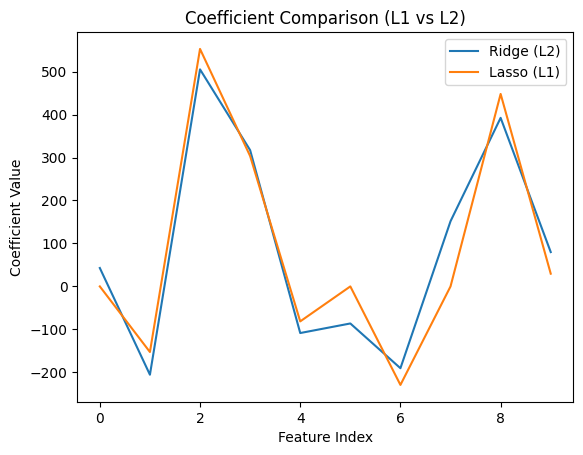

In [7]:
# Coefficient Comparison : Visualization

import matplotlib.pyplot as plt

plt.figure()
plt.plot(best_ridge.coef_, label="Ridge (L2)")
plt.plot(best_lasso.coef_, label="Lasso (L1)")
plt.legend()
plt.title("Coefficient Comparison (L1 vs L2)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()


In [8]:
#Part 2
# Task 4.1: Load and Split Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 455
Test samples: 114


In [9]:
# Task 4.2 (Step 1): Baseline Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=5000)

log_reg.fit(X_train, y_train)

train_acc = accuracy_score(y_train, log_reg.predict(X_train))
test_acc = accuracy_score(y_test, log_reg.predict(X_test))

print("Baseline Logistic Regression")
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Coefficients:\n", log_reg.coef_)


Baseline Logistic Regression
Training Accuracy: 0.9582417582417583
Test Accuracy: 0.956140350877193
Coefficients:
 [[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]


In [10]:
# Task 4.2 (Step 2): Hyperparameter Tuning

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_reg_cv = GridSearchCV(
    LogisticRegression(max_iter=5000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

log_reg_cv.fit(X_train, y_train)

best_log_reg = log_reg_cv.best_estimator_

print("Best Parameters:", log_reg_cv.best_params_)

print("Training Accuracy:",
      accuracy_score(y_train, best_log_reg.predict(X_train)))
print("Test Accuracy:",
      accuracy_score(y_test, best_log_reg.predict(X_test)))


Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Training Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771


In [11]:
# Task 4.2 (Step 3): L1 vs L2 Regularization

log_l1 = LogisticRegression(
    penalty='l1', C=best_log_reg.C,
    solver='liblinear', max_iter=5000
)

log_l2 = LogisticRegression(
    penalty='l2', C=best_log_reg.C,
    solver='liblinear', max_iter=5000
)

log_l1.fit(X_train, y_train)
log_l2.fit(X_train, y_train)

print("L1 Training Accuracy:",
      accuracy_score(y_train, log_l1.predict(X_train)))
print("L1 Test Accuracy:",
      accuracy_score(y_test, log_l1.predict(X_test)))

print("L2 Training Accuracy:",
      accuracy_score(y_train, log_l2.predict(X_train)))
print("L2 Test Accuracy:",
      accuracy_score(y_test, log_l2.predict(X_test)))

print("Zero coefficients in L1:",
      (log_l1.coef_ == 0).sum())


L1 Training Accuracy: 0.989010989010989
L1 Test Accuracy: 0.9824561403508771
L2 Training Accuracy: 0.9692307692307692
L2 Test Accuracy: 0.956140350877193
Zero coefficients in L1: 9


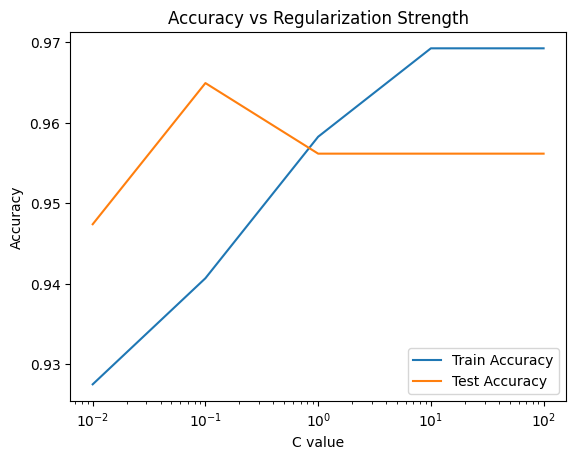

In [12]:
#  Accuracy vs C: Visualization

C_values = [0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for c in C_values:
    model = LogisticRegression(C=c, solver='liblinear', max_iter=5000)
    model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))

import matplotlib.pyplot as plt

plt.figure()
plt.plot(C_values, train_scores, label="Train Accuracy")
plt.plot(C_values, test_scores, label="Test Accuracy")
plt.xscale('log')
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Regularization Strength")
plt.legend()
plt.show()
